Dataset: http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

In [ ]:
from os import listdir
from os.path import isfile, join
import string

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
main_path = '20_newsgroups'
folders = listdir(main_path)

documents = []
Y = []

for folder in folders:
    folder_path = join(main_path, folder)
    total_files_in_folder = len(listdir(folder_path))
    Y += ([folder] * total_files_in_folder)
    for document in listdir(folder_path):
        documents.append(join(folder_path, document))
        
documents = np.array(documents)
Y = np.array(Y)

In [ ]:
document_train, document_test, Y_train, Y_test = np.array([]), np.array([]), np.array([]), np.array([])
for folder in folders:  
    a, b, c, d = train_test_split(documents[Y == folder], Y[Y == folder], random_state = 0,
                                  test_size = 0.25)
    document_train = np.append(document_train, a) 
    document_test = np.append(document_test, b)
    Y_train = np.append(Y_train, c)
    Y_test = np.append(Y_test, d)

In [ ]:
#function to preprocess the words list to remove punctuations
def preprocess(words_list):
    #we create an empty translation table where every character in the first argument is mapped to
    #every character in the second argument and every character in the third argument is mapped to
    #none  
    
    #" \t " in a word becomes none
    translation_table = str.maketrans('', '', '\t')
    words_list = [word.translate(translation_table) for word in words_list]
    
    #" ' " appears in a lot of words and would change the meaning of the words if removed,
    #hence it is removed from the list of punctuations we plan to remove from the words
    punctuations = (string.punctuation).replace("'", "") 
    #all punctuation characters become none 
    translation_table = str.maketrans('', '', punctuations)
    words_list = [word.translate(translation_table) for word in words_list]
    
    #removing blank strings
    words_list = [word for word in words_list if word]
    
    #some words are quoted in the documents and as we have not removed " ' " to maintain 
    #the meaning of the words, we try to unquote such words below
    for i in range(len(words_list)):
        if ((words_list[i][0] == "'") and (words_list[i][-1] == "'")):
            words_list[i] = words_list[i][1:-1]
        elif(words_list[i][0] == "'"):
            words_list[i] = words_list[i][1:]
        
    #we will also remove just numeric strings as they do not have any significant meaning in 
    #text classification
    words_list = [word for word in words_list if not word.isdigit()]
    
    #removing blank strings
    words_list = [word for word in words_list if word]
    
    #making all words lower-case
    words_list = [word.lower() for word in words_list]
    
    #removing words with two or less characters
    words_list = [word for word in words_list if (len(word) > 2)]
    
    return words_list

In [ ]:
#function to remove stopwords
stopwords = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any',
             'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 
             'between', 'both', 'but', 'by', 'can', "can't", 'cannot', 'could', "couldn't", 'did',
             "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few',
             'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 
             'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself',
             'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 
             'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 
             'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 
             'only', 'or', 'other', 'ought', 'our', 'ours' 'ourselves', 'out', 'over', 'own',
             'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 
             'some', 'such', 'than', 'that',"that's", 'the', 'their', 'theirs', 'them', 
             'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", "they'll", 
             "they're", "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 
             'up', 'very', 'was', "wasn't", 'we', "we'd", "we'll", "we're", "we've", 'were', 
             "weren't", 'what', "what's", 'when', "when's", 'where', "where's", 'which', 'while',
             'who', "who's", 'whom', 'why', "why's",'will', 'with', "won't", 'would', "wouldn't",
             'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 
             'yourselves', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine',
             'ten', 'hundred', 'thousand', '1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th',
             '9th', '10th']

def remove_stopwords(words_list):
    words_list = [word for word in words_list if not word in stopwords]
    return words_list

In [ ]:
#function to convert a single line into a list of words
def tokenize_line(line):
    words_list = line[0:].strip().split(" ")
    words_list = preprocess(words_list)
    words_list = remove_stopwords(words_list)
    
    return words_list

In [ ]:
#function to remove metadata from the whole document
def remove_metadata(lines):
    for i in range(len(lines)):
        if(lines[i] == '\n'):
            temp = i + 1
            break
    lines = lines[temp:]
    return lines

In [ ]:
#function to convert a document into a list of words
def tokenize_document(path):
    #load the document as a list of lines
    f = open(path, 'r')
    document_lines = f.readlines()
    
    #removing the metadata at the top of each document
    document_lines = remove_metadata(document_lines)
    
    document_words = []
    
    #tokenize all the lines of the document
    for line in document_lines:
        document_words.append(tokenize_line(line))

    return document_words

In [ ]:
#function to flatten a 2D array to a 1D array
def flatten(words_list):
    words_list_flattened = []
    for line in words_list:
        for word in line:
            words_list_flattened.append(word)
    return words_list_flattened

In [ ]:
training_document_words_list = []
for document in document_train:
    training_document_words_list.append(flatten(tokenize_document(document)))

In [ ]:
all_words_list = np.array(flatten(training_document_words_list))

In [ ]:
len(all_words_list)

1917496

In [ ]:
#finding frequencies of unique words and sorting them in decreasing order
unique_words, frequency = np.unique(all_words_list, return_counts = True)
unique_words_sorted, frequency_sorted = (list(i) for i in zip(*(sorted(zip(unique_words, frequency), 
                                        key = lambda awd:(awd[1], awd[0]), reverse=True))))

In [ ]:
#making variables for frequency of words and number of words with that frequency
number_of_words = []
frequency_of_words = []
for specific_frequency in sorted(np.unique(frequency_sorted), reverse=True):
    frequency_of_words.append(specific_frequency)
    number_of_words.append(frequency_sorted.count(specific_frequency))

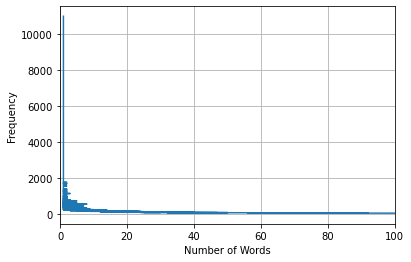

In [ ]:
#plotting graph for frequency vs number of words with that frequency
x = number_of_words
y = frequency_of_words
plt.xlim(0, 100)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.plot(x, y)
plt.grid()
plt.show()

In [ ]:
#using first 5000 words as features
features = unique_words_sorted[0:5000]

# Making X_train and Y_train

In [ ]:
#making the final X_train 2d array

#making a dictionary with count of unique words for every document
X_train_dictionary = {}
document_number = 1
for document_words in training_document_words_list:
    document_words = np.asarray(document_words)
    unique_words, frequency = np.unique(document_words, return_counts = True)
    X_train_dictionary[document_number] = {}
    for i in range(len(unique_words)):
        X_train_dictionary[document_number][unique_words[i]] = frequency[i]
    document_number = document_number + 1
    
#converting dictionary to X_train
X_train = []
for document_number in X_train_dictionary.keys():
    X_train_row = []
    for word in features:
        if(word in X_train_dictionary[document_number].keys()):
            X_train_row.append(X_train_dictionary[document_number][word]) 
        else:
            X_train_row.append(0)
    X_train.append(X_train_row)
    
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

# Making X_test and Y_test

In [ ]:
#making the list of words for every testing document
testing_document_words_list = []
for document in document_test:
    testing_document_words_list.append(flatten(tokenize_document(document)))

In [ ]:
#making the final X_test 2d array

#making a dictionary with count of unique words for every document
X_test_dictionary = {}
document_number = 1
for document_words in testing_document_words_list:
    document_words = np.asarray(document_words)
    unique_words, frequency = np.unique(document_words, return_counts = True)
    X_test_dictionary[document_number] = {}
    for i in range(len(unique_words)):
        X_test_dictionary[document_number][unique_words[i]] = frequency[i]
    document_number = document_number + 1
    
#converting dictionary to X_test
X_test = []
for document_number in X_test_dictionary.keys():
    X_test_row = []
    for word in features:
        if(word in X_test_dictionary[document_number].keys()):
            X_test_row.append(X_test_dictionary[document_number][word]) 
        else:
            X_test_row.append(0)
    X_test.append(X_test_row)
    
X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)

# Text Classification using Multinomial Naive Bayes from SKLearn

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

MultinomialNB()

#### Testing Metrics

In [ ]:
Y_test_preds = classifier.predict(X_test)

In [ ]:
print('Classification Report:\n', classification_report(Y_test, Y_test_preds))
print('-'*132)
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_test_preds))
print('-'*132)
print('Accuracy:', accuracy_score(Y_test, Y_test_preds) * 100, '%')

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.61      0.74      0.67       250
           comp.graphics       0.63      0.64      0.64       250
 comp.os.ms-windows.misc       0.68      0.70      0.69       250
comp.sys.ibm.pc.hardware       0.66      0.66      0.66       250
   comp.sys.mac.hardware       0.72      0.78      0.75       250
          comp.windows.x       0.79      0.75      0.77       250
            misc.forsale       0.79      0.74      0.76       250
               rec.autos       0.82      0.88      0.85       250
         rec.motorcycles       0.83      0.89      0.86       250
      rec.sport.baseball       0.90      0.91      0.91       250
        rec.sport.hockey       0.94      0.93      0.93       250
               sci.crypt       0.88      0.88      0.88       250
         sci.electronics       0.77      0.68      0.72       250
                 sci.med       0.91      0.82      

#### Training Metrics

In [ ]:
Y_train_preds = classifier.predict(X_train)

In [ ]:
print('Classification Report:\n', classification_report(Y_train, Y_train_preds))
print('-'*132)
print('Confusion Matrix:\n', confusion_matrix(Y_train, Y_train_preds))
print('-'*132)
print('Accuracy:', accuracy_score(Y_train, Y_train_preds) * 100, '%')

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.69      0.86      0.77       750
           comp.graphics       0.70      0.73      0.72       750
 comp.os.ms-windows.misc       0.79      0.81      0.80       750
comp.sys.ibm.pc.hardware       0.77      0.79      0.78       750
   comp.sys.mac.hardware       0.80      0.86      0.83       750
          comp.windows.x       0.86      0.82      0.84       750
            misc.forsale       0.84      0.84      0.84       750
               rec.autos       0.87      0.88      0.88       750
         rec.motorcycles       0.89      0.95      0.92       750
      rec.sport.baseball       0.93      0.94      0.93       750
        rec.sport.hockey       0.97      0.96      0.96       750
               sci.crypt       0.94      0.89      0.91       750
         sci.electronics       0.84      0.78      0.81       750
                 sci.med       0.91      0.90      

# Text Classification using Multinomial Naive Bayes from scratch

In [ ]:
#The Multinomial Naive Bayes class.
class MultinomialNaiveBayes:
    '''This class implements the Multinomial Naive Bayes classifier.'''

    #Constructor which initializes the dictionary.
    def __init__(self):
        self.X_train_dictionary = {}

    #The fit function analogous to the one in Scikit Learn. This function creates the dictionary
    #which contains the frequency of every word in the vocabulary per class along with class length
    #per class and total length
    def fit(self, X_train, Y_train):
        self.classes = np.unique(Y_train)
        self.X_train_dictionary['total_length'] = len(X_train)
        for cls in self.classes:
            current_class_X_train = X_train[Y_train == cls]
            self.X_train_dictionary[cls] = {}
            self.X_train_dictionary[cls]['total_words'] = 0
            self.X_train_dictionary[cls]['class_length'] = len(current_class_X_train)
            for i in range(X_train.shape[1]):
                word_frequency = current_class_X_train[:, i].sum()
                self.X_train_dictionary[cls][i] = word_frequency
                self.X_train_dictionary[cls]['total_words'] += word_frequency
        
    #this function calculates the probability of a single test data point belonging to a single class
    def probability(self, x, current_class):
        result = np.log(self.X_train_dictionary[current_class]['class_length']) - np.log(self.X_train_dictionary['total_length'])
        for i in range(len(x)):
            if(x[i] == 0):
                continue
            numerator = self.X_train_dictionary[current_class][i] + 1
            denominator = self.X_train_dictionary[current_class]['total_words'] + len(x)
            result += (x[i]*(np.log(numerator) - np.log(denominator)))

        return result
    
    #this is a helper function used to predict the class for a single test data point 
    def predict_single_point(self, x):
        best_probability = -100000000
        best_class = -1

        for current_class in self.classes:
            current_class_probability = self.probability(x, current_class)
            if(current_class_probability > best_probability):
                best_probability = current_class_probability
                best_class = current_class 
    
        return best_class
    
    #this function is analogous to the predict function in scikit learn which takes in X_test and returns
    #the predictions for the same
    def predict(self, X_test):
        Y_preds = []
        for x in X_test:
            Y_preds.append(self.predict_single_point(x))
        return Y_preds

#### Testing Metrics

In [ ]:
classifier = MultinomialNaiveBayes()
classifier.fit(X_train, Y_train)

In [ ]:
Y_preds = classifier.predict(X_test)

In [ ]:
print('Classification Report:\n', classification_report(Y_test, Y_preds))
print('-'*132)
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_preds))
print('-'*132)
print('Accuracy:', accuracy_score(Y_test, Y_preds) * 100, '%')

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.61      0.74      0.67       250
           comp.graphics       0.63      0.64      0.64       250
 comp.os.ms-windows.misc       0.68      0.70      0.69       250
comp.sys.ibm.pc.hardware       0.66      0.66      0.66       250
   comp.sys.mac.hardware       0.72      0.78      0.75       250
          comp.windows.x       0.79      0.75      0.77       250
            misc.forsale       0.79      0.74      0.76       250
               rec.autos       0.82      0.88      0.85       250
         rec.motorcycles       0.83      0.89      0.86       250
      rec.sport.baseball       0.90      0.91      0.91       250
        rec.sport.hockey       0.94      0.93      0.93       250
               sci.crypt       0.88      0.88      0.88       250
         sci.electronics       0.77      0.68      0.72       250
                 sci.med       0.91      0.82      